### K-Means Clustering for Stock Market Data
K-means clustering is a type of unsupervised learning model. Unsupervised models are used to learn from a data set that is not labeled or classified. It identifies commonalities in the data set and react based on the presence or absence of such commonalities in each data point.

A K-means clustering model simply initialize K number of centroids and data points that are close (similar) to the centroids will be categorized as a cluster.

In [1]:
from pandas_datareader import data 
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go

In [2]:
companies_list = ['ASIANPAINT','GRASIM','SBILIFE','SBIN','BPCL','TCS','JSWSTEEL','M&M','BAJAJFINSV','HDFCLIFE',
                  'ICICIBANK','IOC','ONGC','ITC','HEROMOTOCO','NTPC','BAJAJ-AUTO','TATASTEEL','SUNPHARMA','RELIANCE',
                  'BRITANNIA','ULTRACEMCO','BAJFINANCE','SHREECEM','MARUTI','TATAMOTORS','CIPLA','HDFCBANK','DRREDDY',
                  'INDUSINDBK','ADANIPORTS','HINDUNILVR','HINDALCO','NESTLEIND','INFY','POWERGRID','LT','TECHM',
                  'BHARTIARTL','HCLTECH','EICHERMOT','WIPRO','UPL','COALINDIA','AXISBANK','KOTAKBANK','TATACONSUM',
                  'HDFC','TITAN','DIVISLAB']

In [3]:
data_source = 'yahoo'

In [4]:
start = '2016-12-11'
end = '2016-12-11'

In [5]:
companies_list_suffix = [sub + '.NS' for sub in companies_list]

In [12]:
import yfinance as yf

In [13]:
data_source = yf.download(tickers=companies_list_suffix,start='2020-12-01',end='2021-12-01')

[*********************100%***********************]  50 of 50 completed


In [14]:
data_source.head()

Adj Close                                          \
           ADANIPORTS.NS ASIANPAINT.NS AXISBANK.NS BAJAJ-AUTO.NS   
Date                                                               
2020-12-01    420.851624   2216.447510  603.650024   3135.225098   
2020-12-02    435.151459   2301.724121  608.099976   3226.566162   
2020-12-03    432.768127   2396.691162  602.700012   3184.278564   
2020-12-04    450.543610   2423.874268  614.500000   3200.710449   
2020-12-07    468.219788   2457.468262  619.250000   3208.588135   

                                                                               \
           BAJAJFINSV.NS BAJFINANCE.NS BHARTIARTL.NS     BPCL.NS BRITANNIA.NS   
Date                                                                            
2020-12-01   8744.429688   4853.257812    479.450012  330.900635  3557.060303   
2020-12-02   8800.066406   4816.117676    484.899994  335.437134  3525.354492   
2020-12-03   9111.840820   4859.597656    479.899994  343.637665  3563.528564   
2020-12-04   9050.255859   4867.484863    493.750000  342.241791  3575.534668   
2020-12-07   9049.755859   4821.659180    508.950012  344.597290  3556.668213   

                        ...       Volume                              \
              CIPLA.NS  ... SUNPHARMA.NS TATACONSUM.NS TATAMOTORS.NS   
Date                    ...                                            
2020-12-01  751.454224  ...     25388623       5105352      48881250   
2020-12-02  754.189148  ...     14234038       3694795      88107889   
2020-12-03  757.968384  ...      9345458       3859218      33332481   
2020-12-04  762.742004  ...     16177536       4170295      47995639   
2020-12-07  768.908020  ...     21232768       3707125      29802472   

                                                                            \
           TATASTEEL.NS   TCS.NS TECHM.NS TITAN.NS ULTRACEMCO.NS    UPL.NS   
Date                                                                         
2020-12-01     14739109  3605017  5821698  2881906        752883  14928450   
2020-12-02     24997085  2509032  5516684  2969071        696234  14187495   
2020-12-03     24775652  2852548  5705020  3939085        740259  13251977   
2020-12-04     20153552  2686527  4302626  2229459       2996248   7719922   
2020-12-07     15588321  1996400  3973325  1430365        910850  11443788   

                      
            WIPRO.NS  
Date                  
2020-12-01  10693567  
2020-12-02   9434077  
2020-12-03  10697045  
2020-12-04   7427393  
2020-12-07   8392383  

[5 rows x 300 columns]

In [15]:
data_source.isna().sum()

Adj Close  ADANIPORTS.NS    0
           ASIANPAINT.NS    0
           AXISBANK.NS      0
           BAJAJ-AUTO.NS    0
           BAJAJFINSV.NS    0
                           ..
Volume     TECHM.NS         0
           TITAN.NS         0
           ULTRACEMCO.NS    0
           UPL.NS           0
           WIPRO.NS         0
Length: 300, dtype: int64

In [16]:
stock_open = np.array(data_source['Open']).T # stock_open is numpy array of transpose of df['Open']
stock_close = np.array(data_source['Close']).T # stock_close is numpy array of transpose of df['Close']

In [17]:
#‘movement’ is the difference of opening and closing prices of a particular day. 
#Positive movement suggests to go long on stock(buy) and negative movement suggests to short the stock(sell).
movements = stock_close - stock_open

In [18]:
sum_of_movement = stock_close - stock_open

In [20]:
for i in range(len(companies_list)):
 print('company:{}, Change:{}'.format(data_source['High'].columns[i],sum_of_movement[i]))

company:ADANIPORTS.NS, Change:[  8.79998779  13.30001831  -6.20001221  14.          10.5
  -9.3500061   -3.75         7.1000061   -5.45001221  -1.6000061
   6.25        -4.45001221 -10.25        -4.45001221 -14.75
  24.3999939    3.6000061    3.6499939    3.54998779  -1.6000061
   1.3999939   -1.6499939   18.8500061   -8.1000061    0.55001831
  -5.          13.74996948  -3.         -12.1000061    4.25
  20.75        -1.          -8.84997559 -15.5         16.79998779
  29.59997559 -14.19995117 -13.70001221 -19.34997559  -9.40002441
   3.39996338 -17.84997559  28.45001221   2.09997559  10.54998779
  10.5         -4.04998779   9.89996338  -7.70001221  -7.90002441
  15.          24.29998779   9.79998779   6.75        -2.25
   3.25       -11.45001221  15.         -18.          -1.5
  34.89996338 -21.19995117   8.30004883  22.90002441  -2.15002441
  19.20001221  -3.5        -14.29998779  -4.79998779 -12.15002441
 -20.84997559  -8.75       -14.05004883 -26.75       -15.34997559
   8.84997559 

Lets Consider Tata Steel and JSW Steel

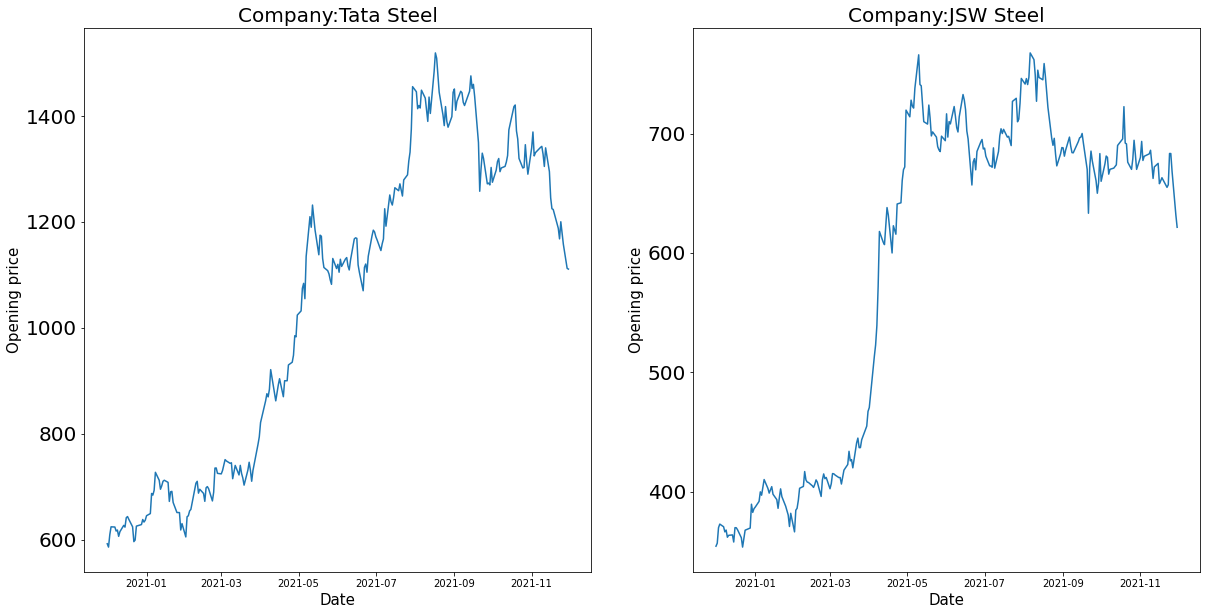

In [22]:
plt.figure(figsize = (20,10)) 
plt.subplot(1,2,1) 

plt.title('Company:Tata Steel',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(data_source['Open']['TATASTEEL.NS'])
plt.subplot(1,2,2) 

plt.title('Company:JSW Steel',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(data_source['Open']['JSWSTEEL.NS'])

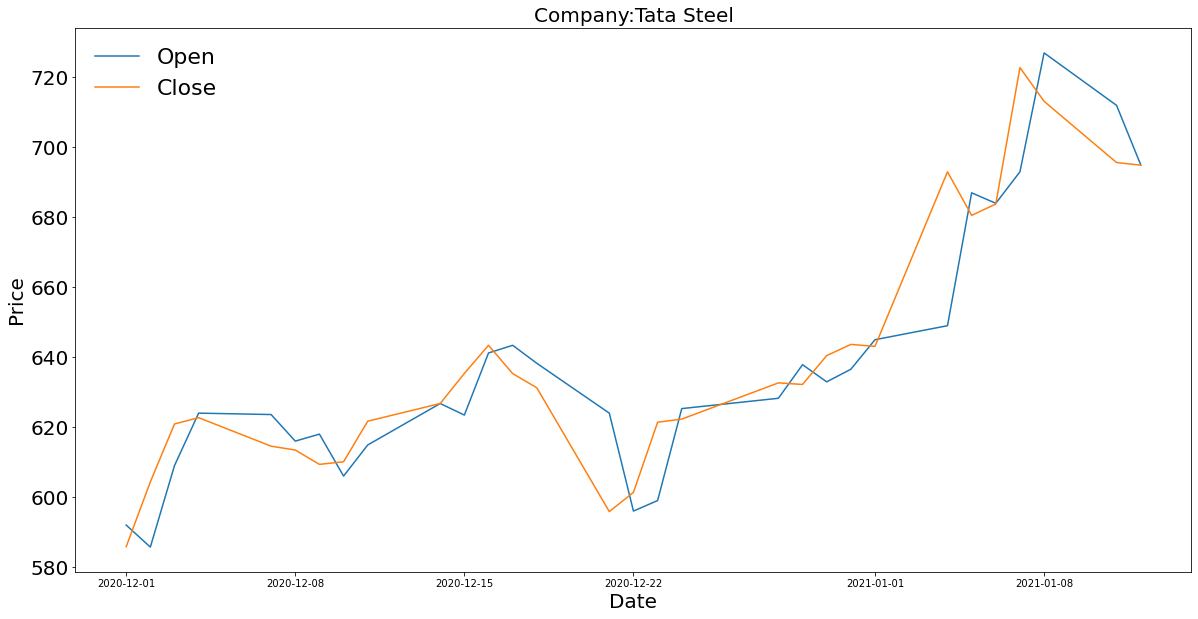

In [26]:
# Adjusting figure size
plt.figure(figsize = (20,10)) 
plt.title('Company:Tata Steel',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
# Opening prices of first 30 days are plotted against date
plt.plot(data_source.iloc[0:30]['Open']['TATASTEEL.NS'],label = 'Open') 
# Closing prices of first 30 days are plotted against date
plt.plot(data_source.iloc[0:30]['Close']['TATASTEEL.NS'],label = 'Close')
# Properties of legend box
plt.legend(loc='upper left', frameon=False,framealpha=1,prop={'size': 22}) 

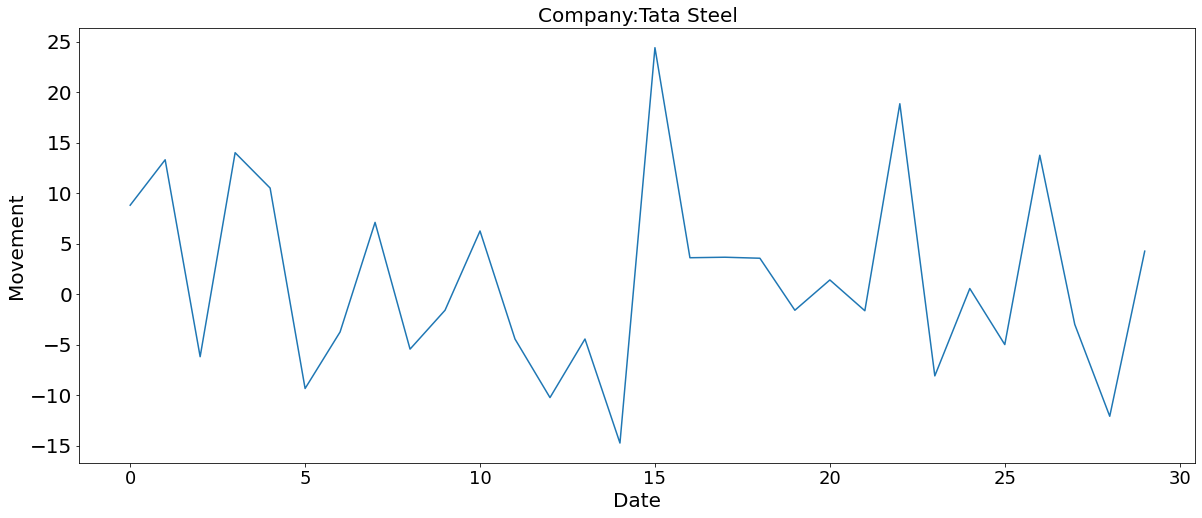

In [27]:
plt.figure(figsize = (20,8)) 
plt.title('Company:Tata Steel',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0][0:30])

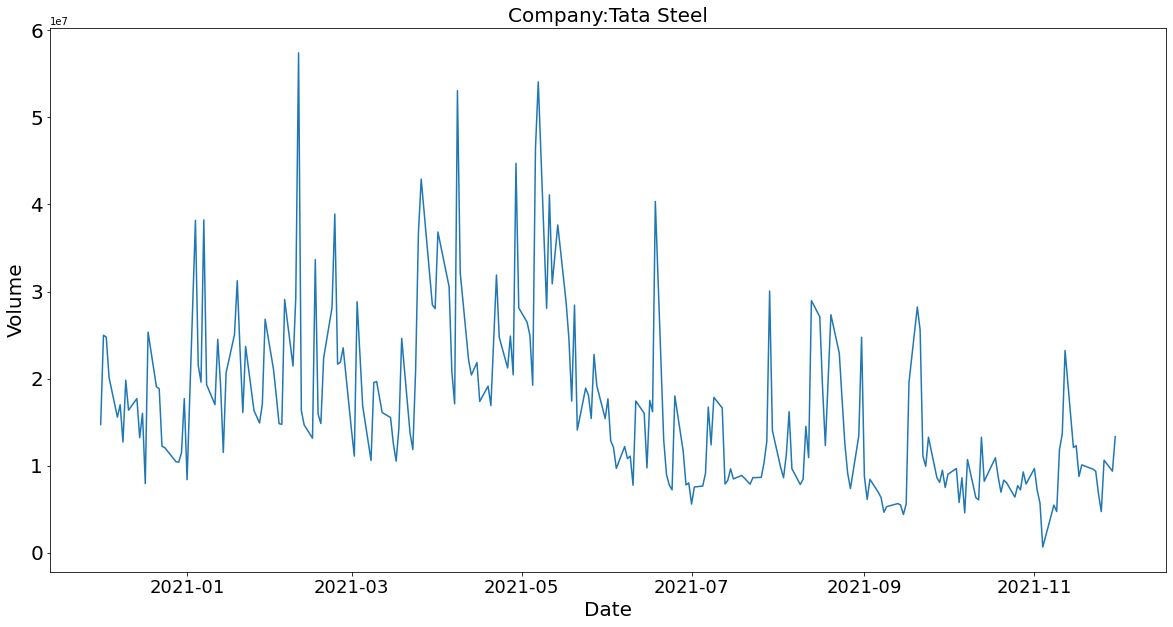

In [29]:
plt.figure(figsize = (20,10)) 
plt.title('Company:Tata Steel',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Volume',fontsize = 20)
plt.plot(data_source['Volume']['TATASTEEL.NS'],label = 'Open')

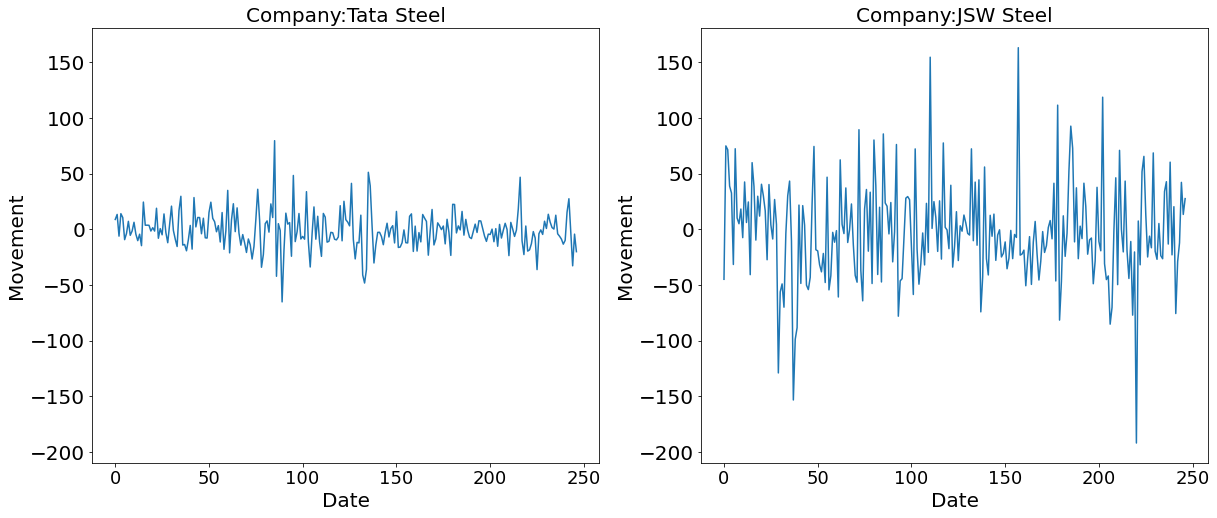

In [30]:
plt.figure(figsize = (20,8)) 
ax1 = plt.subplot(1,2,1)
plt.title('Company:Tata Steel',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0]) 
plt.subplot(1,2,2,sharey = ax1)
plt.title('Company:JSW Steel',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[1])

In [31]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer() # Define a Normalizer
norm_movements = normalizer.fit_transform(movements) # Fit and transform

In [32]:
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())

-0.47440608575262627
0.4088506399607488
-0.004070076861438636


# Creating a Pipeline

In [34]:
# Import the necessary packages
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
# Define a normalizer
normalizer = Normalizer()
# Create Kmeans model
kmeans = KMeans(n_clusters = 10,max_iter = 1000)
# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)
predictions = pipeline.predict(movements)

In [35]:
predictions

array([1, 5, 3, 9, 2, 2, 5, 1, 7, 8, 1, 8, 8, 9, 6, 0, 2, 3, 5, 9, 4, 7,
       3, 3, 0, 1, 3, 4, 3, 2, 9, 9, 7, 1, 1, 1, 1, 2, 3, 6, 8, 5, 9, 4,
       0, 0, 9, 6, 1, 0])

In [37]:
df1 = pd.DataFrame({'labels':predictions,'companies':list(companies_list)}).sort_values(by=['labels'],axis = 0)

In [38]:
df1

,labels,companies
24,0,MARUTI
45,0,KOTAKBANK
44,0,AXISBANK
15,0,NTPC
49,0,DIVISLAB
0,1,ASIANPAINT
7,1,M&M
36,1,LT
35,1,POWERGRID
10,1,ICICIBANK


# Dimension Reduction-Principal Component Analysis(PCA)


In [40]:
from sklearn.decomposition import PCA
# Define a normalizer
normalizer = Normalizer()
# Reduce the data
reduced_data = PCA(n_components = 2)
# Create Kmeans model
kmeans = KMeans(n_clusters = 10,max_iter = 1000)
# Make a pipeline chaining normalizer, pca and kmeans
pipeline = make_pipeline(normalizer,reduced_data,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)
# Prediction
predictions = pipeline.predict(movements)
# Create dataframe to store companies and predicted labels
df2 = pd.DataFrame({'labels':predictions,'companies':companies_list}).sort_values(by=['labels'],axis = 0)

<Figure size 432x288 with 0 Axes>

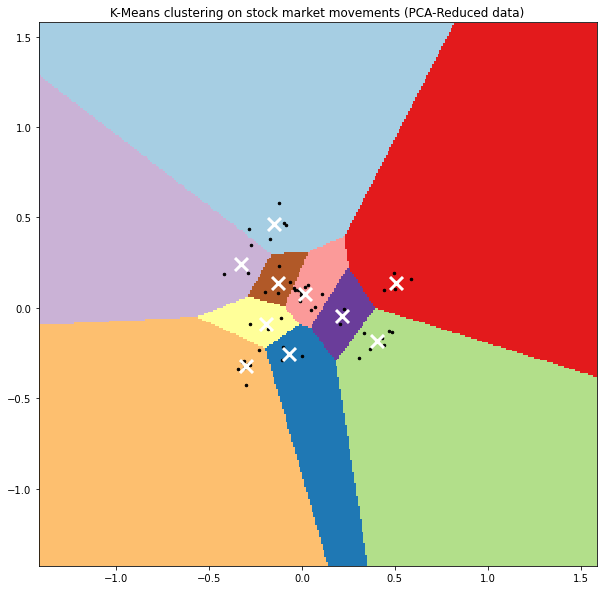

In [42]:
from sklearn.decomposition import PCA
# Reduce the data
reduced_data = PCA(n_components = 2).fit_transform(norm_movements)
# Define step size of mesh
h = 0.01
# Plot the decision boundary
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# Define color plot
cmap = plt.cm.Paired
# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')
plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize = 5)
# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)
plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()